https://nbviewer.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Support%20Vector%20Machines.ipynb

In [23]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import sklearn as sk
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics,svm


In [24]:
iris = datasets.load_iris()
X= iris.data
Y = iris.target


In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
model = SVC()

In [49]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)
model.fit(X_train,Y_train)

SVC()

In [50]:
predicted = model.predict(X_test)

In [51]:
metrics.accuracy_score(Y_test,predicted)

0.8166666666666667

In [52]:
# let's try different kernels 

X= iris.data[:,:2]
Y = iris.target

#SVM regualarization parameter
C = 1.0
#SVC with a linear model
svc = SVC(kernel='linear',C=C).fit(X,Y)
#SVC with a Radial Basis Function
rbf_svc = SVC(kernel='rbf',C=C,gamma=0.7).fit(X,Y)
#SVC with a 3rd degree polynomial
poly_svc = SVC(kernel='poly',C=C,degree=3).fit(X,Y)
#SVC linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)



/Users/vikasraika/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Now that we have fitted the four models, we will go ahead and begin the process of setting up the visual plots. Note: This example is taken from the Sci Kit Learn Documentation.

First we define a mesh to plot in. We define the max and min of the plot for the y and x axis by the smallest and larget features in the data set. We can use numpy's built in mesh grid method to construct our plot.

In [53]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [54]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/var/folders/ll/gphb417961jd7qdl2fflygz80000gn/T/ipykernel_7114/1674501255.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
/var/folders/ll/gphb417961jd7qdl2fflygz80000gn/T/ipykernel_7114/1674501255.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
/var/folders/ll/gphb417961jd7qdl2fflygz80000gn/T/ipykernel_7114/1674501255.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
/var/folders/ll/gphb417961jd7qdl2fflygz80000gn/T/ipykernel_7114/1674501255.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)


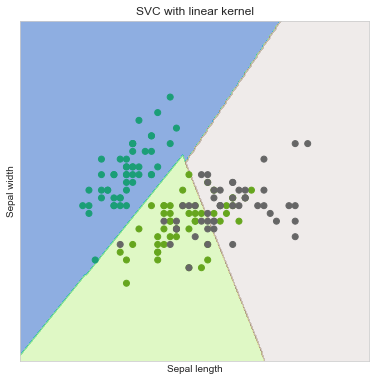

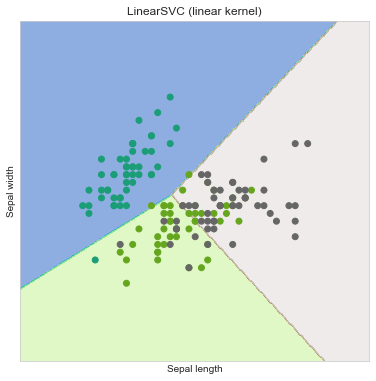

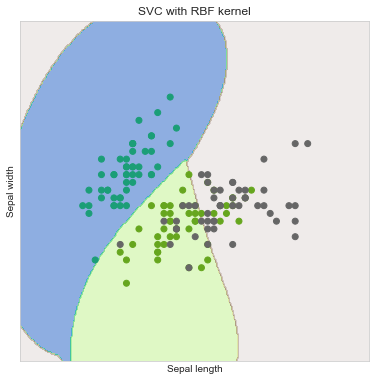

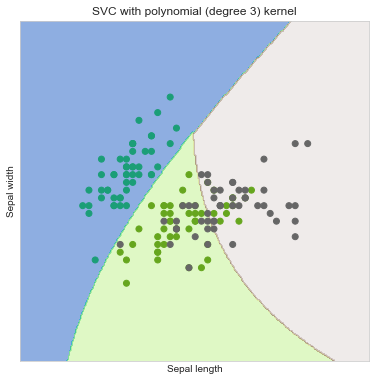

In [55]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()
